<a href="https://colab.research.google.com/github/essential2189/ML_study/blob/main/Hands-On_ML/3.%20Train_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# X는 m(샘플 수) x n(특성 수)

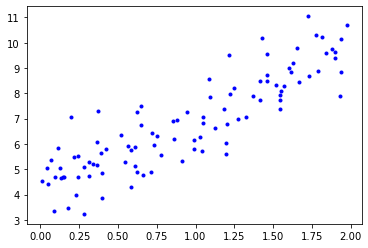

In [3]:
plt.plot(X, y, 'b.')
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

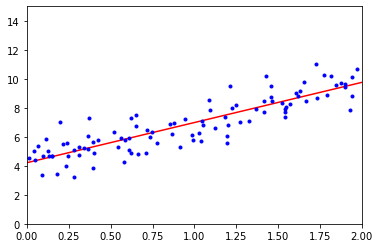

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [9]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [10]:
# 유사역행렬 (pseudoinverse)
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [11]:
theta_path_bgd = []
np.random.seed(42)

# 배치 경사 하강법
eta = 0.1 # 학습률
n_iterations = 1000
m = 100 # 샘플수 

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

theta

array([[4.21509616],
       [2.77011339]])

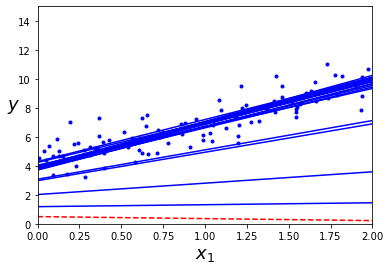

array([[4.21076011],
       [2.74856079]])

In [12]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

# 확률적 경사 하강법 SGD
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터
m = 100 # 샘플수 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show()                                           # 책에는 없음
theta

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

In [15]:
# 미니배치 경사하강법
theta_path_mgd = []

n_iterations = 50
m = 100 # 샘플수 
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [16]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [17]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

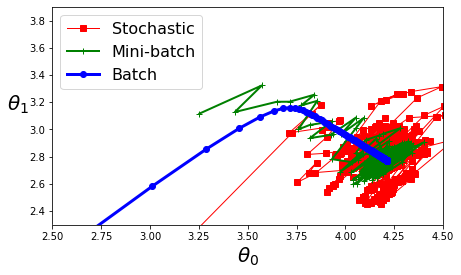

In [18]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [19]:
np.random.seed(42)
# 다항 회귀

m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # np.random.randn(m, 1) : 가우시안 잡음

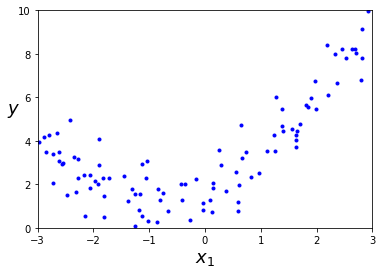

In [20]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0] # X의 degree(2)제곱

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# 실제 y = 0.5  * X**2 +      X + 2    + np.random.randn(m, 1)
# 예측 y = 0.56 * X^^2 + 0.93*X + 1.78

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

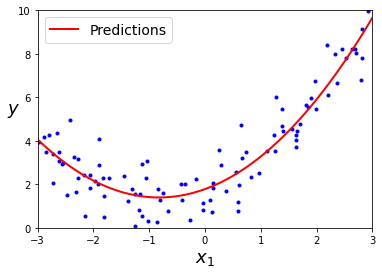

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

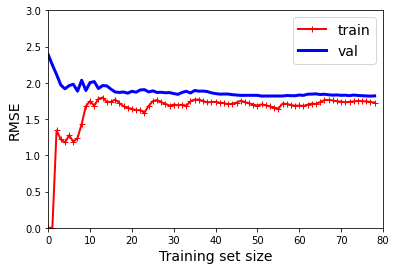

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()
# 과소적합 모델의 전형적인 모습
# 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다

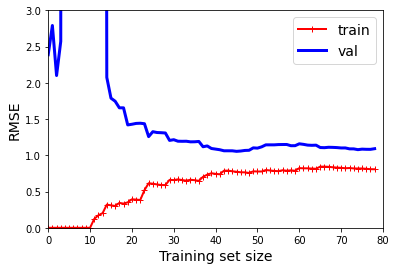

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
                                ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
plt.show()                        # 책에는 없음

![라쏘](https://blog.kakaocdn.net/dn/bQsMdI/btqFtif3UBd/aVU5KbjGskDL900rnBo4c0/img.png)

![라쏘](https://blog.kakaocdn.net/dn/bnYfuy/btqFroH63Bw/V2ahptGHJhnRnJ28c6sBdK/img.png)


m은 가중치의 갯수(혹은 특징의 갯수)이고, α는 페널티의 효과를 조절해주는 하이퍼파라미터다. 이 값이 커지면 페널티 항의 영향력이 커지고, 작아져서 거의 0이 되면 선형 회귀와 같아진다. MSE와 penalty항의 합이 최소가 되게 하는 w와 b를 찾는 것이 바로 라쏘의 목적이다.

그런데 이러한 방법이 어떻게 범용성을 부여해 과적합을 방지하는 것일까? 우선 MSE항이 작아질수록 라벨값과 예측값들의 차이가 작아지고, L1-norm이 작아질수록 많은 가중치들이 0이 되거나 0에 가까워진다는 것을 기억하자. α가 크면 전체값(MSE+penalty)이 L1-norm의 영향을 크게 받아 L1-norm을 작게 만드는 것이 우선시된다. 반면, α가 작으면 MSE가 작아지게 하는 것에 더 비중을 두게 된다. 따라서, α가 너무 작으면 overfitting(복잡도가 너무 큼)이, 너무 크면 underfitting(복잡도가 너무 작음)이 일어난다. α는 하이퍼파라미터로 cross-validation을 통해 적절한 값을 설정해주어야한다.

릿지에 대해 간단히만 언급하자면 패널티 항에 L1-norm 대신에 L2-norm 패널티를 가진다. 차이가 있다면 라쏘는 가중치들이 0이 되지만, 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다. 특성이 많은데 그중 일부분만 중요하다면 라쏘가, 특성의 중요도가 전체적으로 비슷하다면 릿지가 좀 더 괜찮은 모델을 찾아줄 것이다.

In [26]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5  # np.random.randn(m, 1) : 가우시안 잡음
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [27]:
sgd_reg = SGDRegressor(penalty='l2', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [29]:
sgd_reg = SGDRegressor(penalty='l1', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

In [30]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([1.54333232])

In [50]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# Early Stopping
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
train_errors, val_errors = [], []

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행 (반복할수록 overfitting 됨)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

best_val_rmse = np.sqrt(val_error)

best_epoch, best_model, best_val_rmse, val_error

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True),
 1.6438576877932416,
 2.702268097716942)